# Predict Graduate Admissions

#### Probelm Statement :
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

#### Content :
The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

GRE Scores ( out of 340 )<br>
TOEFL Scores ( out of 120 )<br>
University Rating ( out of 5 )<br>
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )<br>
Undergraduate GPA ( out of 10 )<br>
Research Experience ( either 0 or 1 )<br>
Chance of Admit ( ranging from 0 to 1 ) is the Target Variable

#### Models

* ``` Logistic Regression```
* ``` Random Forest```

In [92]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Nirnoy\Placement\Internshevy\Admission_Predict.csv")
print(df)
col_names=df.columns.tolist()
print("Column names:")
print(col_names)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

#### The type of columns can be found below.

In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Check shape of the data and whether there exist missing values:

In [9]:
print('Shape of the data:')
df.shape

Shape of the data:


(500, 9)

In [10]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Fortunately, data has no missing values**

## Data Exploration

In [14]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Row count, which aligns to what the shape attribute showed us.

* The mean, or average.
* 50% aka Median it is very import to understand Skeweness of the Data
* The standard deviation, or how spread out the data is.
* The minimum and maximum value of each column
* The number of items that fall within the first, second, and third percentiles.

In [16]:
df.groupby('University Rating').mean()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [22]:
df[df['Chance of Admit ']>0.82].groupby('Chance of Admit').mean()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Chance of Admit,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


## Data Visualization

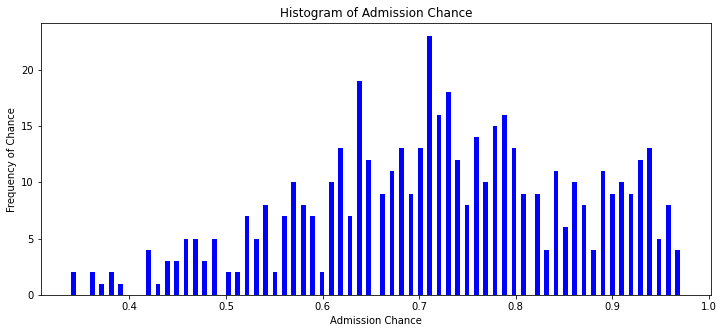

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.hist(df['Chance of Admit '],bins=130,color="blue")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

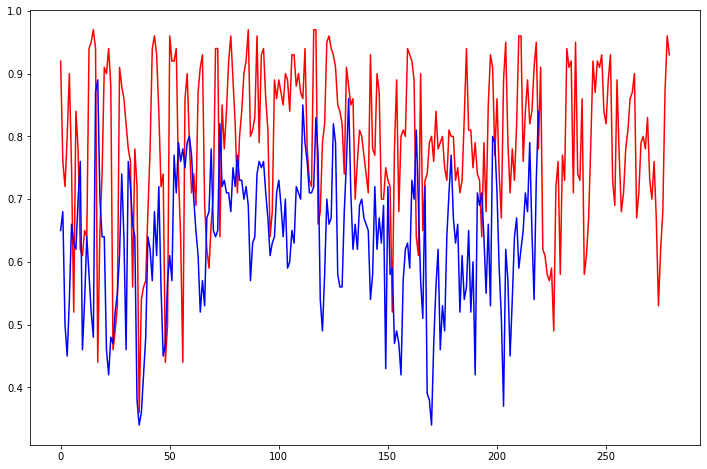

In [52]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['Research']==1])), df[df['Research']==1]['Chance of Admit '], color='red')
plt.plot(range(len(df[df['Research']==0])), df[df['Research']==0]['Chance of Admit '], color='blue')
plt.show()

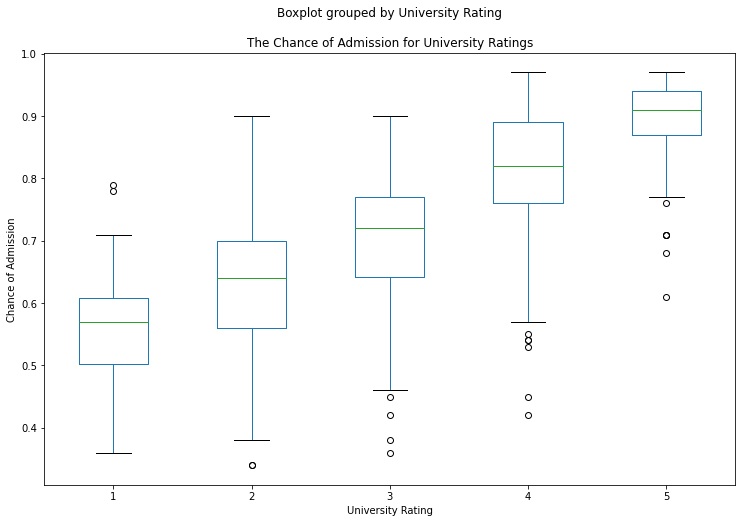

In [54]:
df.boxplot(column='Chance of Admit ',by='University Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

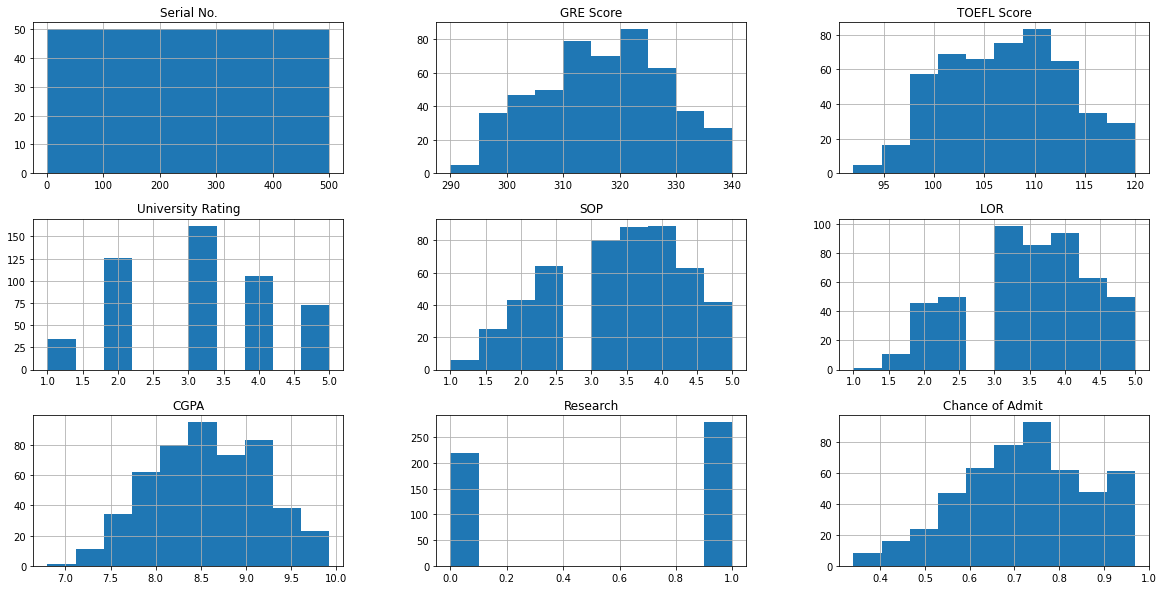

In [63]:
df.hist(bins=10, figsize=(20,10))
plt.show()

* The outcome variable is 'chance', and all other features are predictors.
* 'no' variable should be dropped from dataset since it only indicator of the instances (means ID Column)

In [93]:
df.drop(['Serial No.'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['Chance of Admit ']
x=[i for i in var if i not in ['Chance of Admit ']]
x=df[x]
print(x)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [98]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
print(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])
print(x_test[x_test.columns])

     GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
107       0.96     0.892857               0.75  0.625  0.875  0.852564   
336       0.58     0.642857               0.50  0.500  0.375  0.637821   
71        0.92     0.714286               1.00  1.000  1.000  0.948718   
474       0.36     0.464286               0.75  0.500  0.375  0.368590   
6         0.62     0.607143               0.50  0.500  0.750  0.448718   
..         ...          ...                ...    ...    ...       ...   
323       0.30     0.357143               0.25  0.250  0.375  0.442308   
192       0.64     0.785714               1.00  0.875  0.750  0.685897   
117       0.00     0.428571               0.75  0.250  0.375  0.211538   
47        0.98     0.964286               1.00  0.875  0.750  0.929487   
172       0.64     0.642857               0.75  0.750  1.000  0.746795   

     Research  
107       1.0  
336       0.0  
71        1.0  
474       1.0  
6         1.0  
..        ...  

<ipython-input-98-3c2e637e2c20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

## Classification Models and Analysis

In order to make classification models, outcome of the classification is defined as 'status' which takes value of True for the applicants that have more than 83% chance. Third quartile, 83%, is chosen as threshold since median of the chance data, 72%, is pretty high.

In [102]:
import numpy as np
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

## Logistic Regression

Logistic regression accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


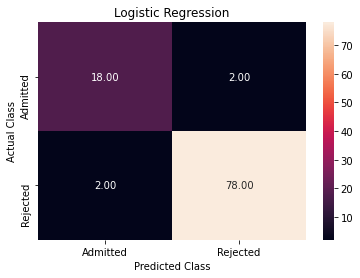

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()

## Random Forest

Random Forest Accuracy: 0.980

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.95      0.95      0.95        20

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


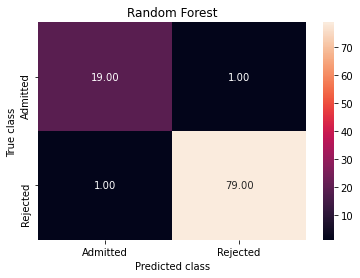

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(x_test))))
print()
print(classification_report(cy_test, rf.predict(x_test)))

cy = rf.predict(x_test)
rf_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

 * How often does my classifier predict admitted students correctly? This measurement is called “recall” and a quick look at these diagrams can demonstrate that models are close but logistic regression.
 * Out of 20 True admitted applicants, LR is correctly classified 18 of them which means the models are approximately have 90% of "recall".
 * How often does my classifier predict students that will be admitted correctly? -- This measurement is called “precision” and Random Forest performs slightly better (17 out of 18) than other classifiers.

* All classifiers have the same accuracy score which is 96%.
 